In [1]:
import pandas as pd

C:\Users\SHRAVANI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Information about dataset


- 1) passengerID
- 2)Survived: whether survived or not 0:No and 1: yes
- 3)pclass: ticket class 1: 1st class 2: 2nd class 3: 3rd class
- Name: Name of passengers
- Gender
- Age in years
- SibSp: No of siblings/ spouses aboard the titanic
- Parch: No of parents/ children aboard the titanic
- Ticket: Ticket number
- Fare: passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation: C- Cherbourg Q- Queenstown S- Southamption

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 177 null values in age columns and 687 null values in cabin column as well as 2 null values in embarked coulmn

#### Imputation technique

- use median imputation for age columns
- use mode(most frequent) imputation for embarked column since it contains categorical values

In [9]:
from sklearn.impute import SimpleImputer

# Impute Age using median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Impute Embarked using most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
# Impute Embarked using most frequent value (FIXED)
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()


#### checking if all the na's are filled 

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Drop column cabin since it has excessive missing values

In [12]:
### Drop column cabin since it contains most null values
# Drop columns with excessive missing values or not useful for ML
df.drop(columns=['Cabin'], inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
import numpy as np # for numerical opt.
import seaborn as sns # adv. visulazation
import matplotlib.pyplot as plt  # basic visulaztion

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
# Select numerical columns
numerical_cols = df[['Age', 'Fare', 'SibSp', 'Parch']]

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.corr(numeric_only=True,method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.034584,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.037004,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.317406,-0.043019,-0.022801,-0.688032
Age,0.034584,-0.037004,-0.317406,1.000000,-0.145316,-0.217488,0.126006
SibSp,-0.061161,0.088879,-0.043019,-0.145316,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217488,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.126006,0.447113,0.410074,1.000000


- Variables Pclass(passengers class) and Fare has negative high correlation.
- Variables Survived and Parch, Survived and Fare, Parch and fare, Age and fare, fare and sibsp have moderate positive correlation. 

### Outlier detection

Text(0.5, 1.0, ' Boxplot for fare')

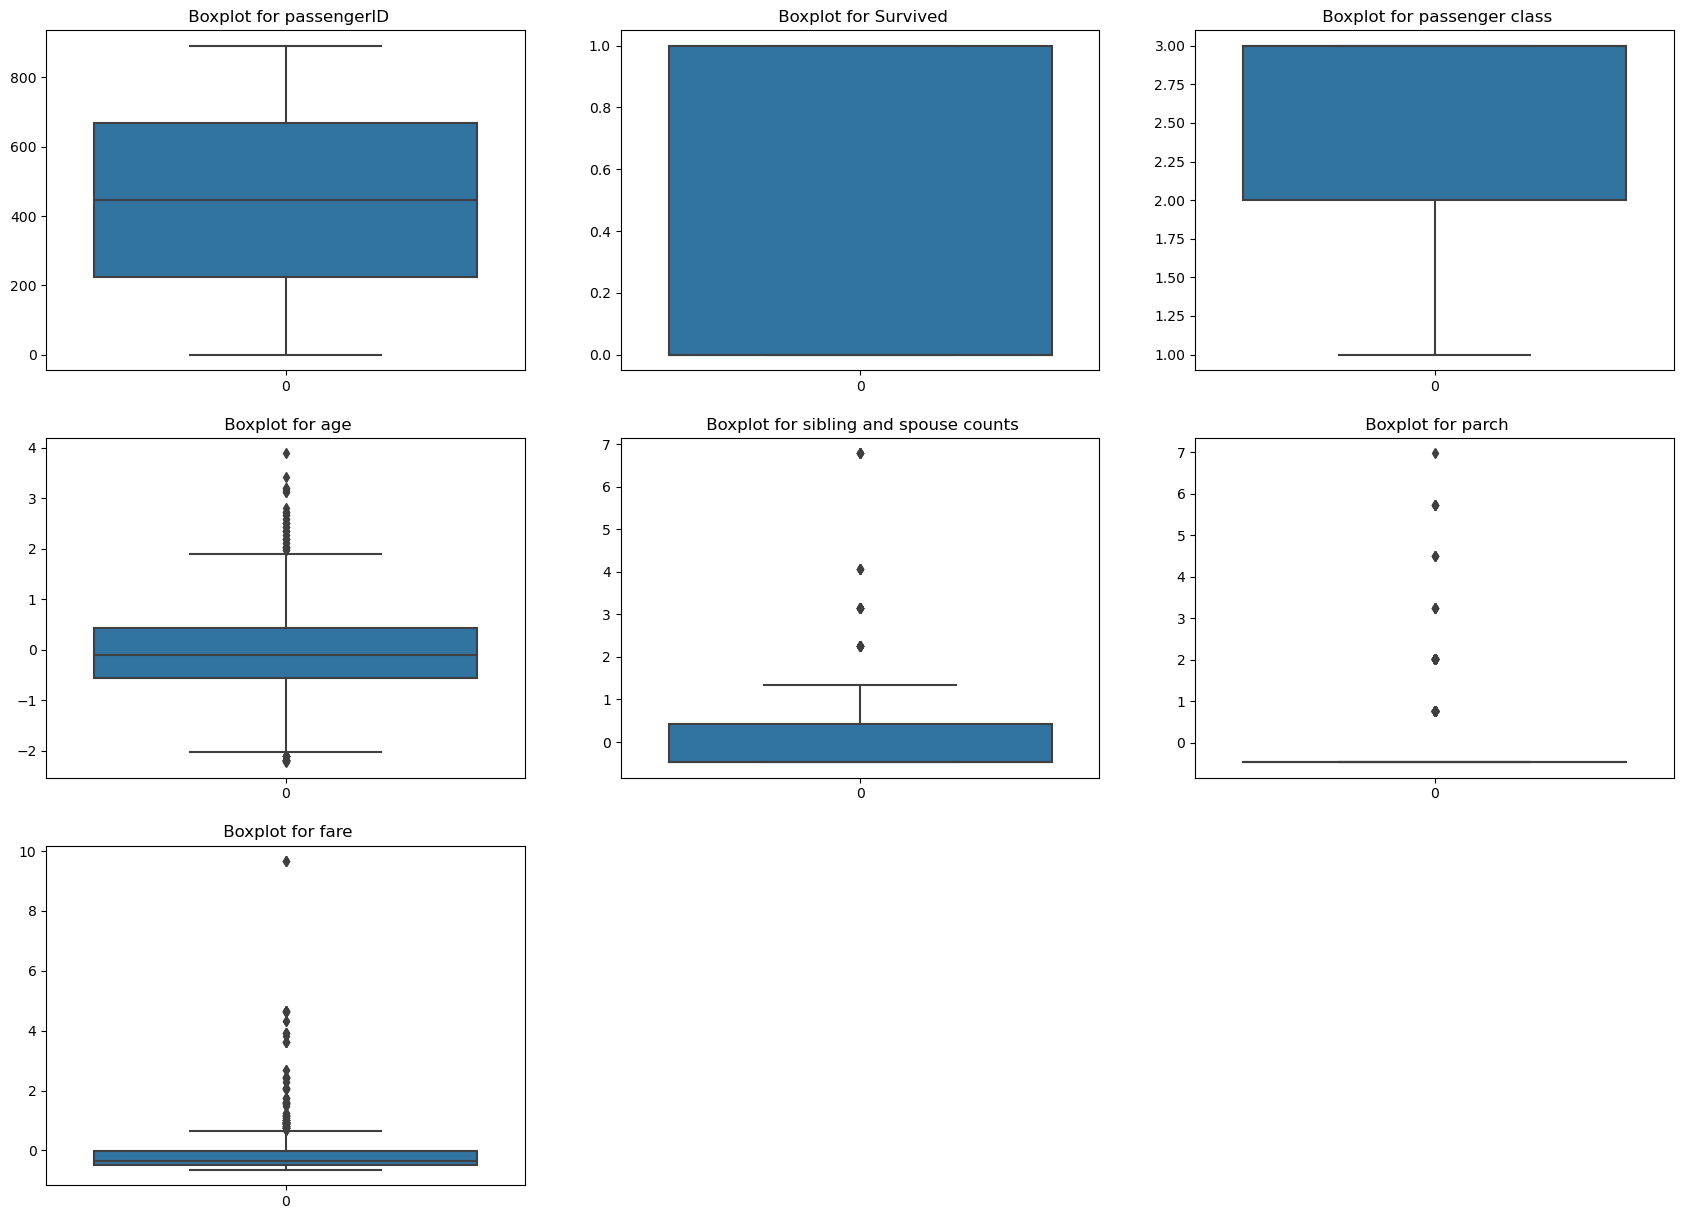

In [40]:
fig=plt.figure(figsize=(21,15))
plt.subplot(3,3,1)
sns.boxplot(data=df['PassengerId'])
plt.title(" Boxplot for passengerID")
plt.subplot(3,3,2)
sns.boxplot(data=df['Survived'])
plt.title(" Boxplot for Survived")
plt.subplot(3,3,3)
sns.boxplot(data=df['Pclass'])
plt.title(" Boxplot for passenger class")
plt.subplot(3,3,4)
sns.boxplot(data=df['Age'])
plt.title(" Boxplot for age")
plt.subplot(3,3,5)
sns.boxplot(data=df['SibSp'])
plt.title(" Boxplot for sibling and spouse counts")
plt.subplot(3,3,6)
sns.boxplot(data=df['Parch'])
plt.title(" Boxplot for parch")
plt.subplot(3,3,7)
sns.boxplot(data=df['Fare'])
plt.title(" Boxplot for fare")

- Variables age, sibling and spouse count, parch, fare contains outlier.

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


#### Encoding for categorical variables 

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


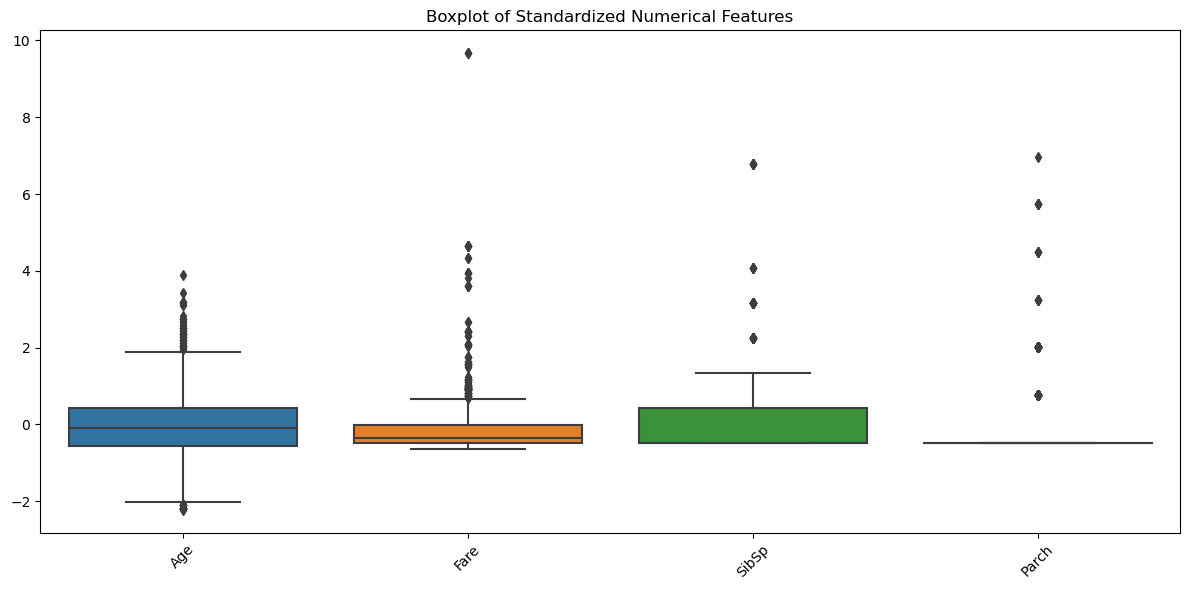

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Standardized Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Check size before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (891, 11)
After outlier removal: (577, 11)


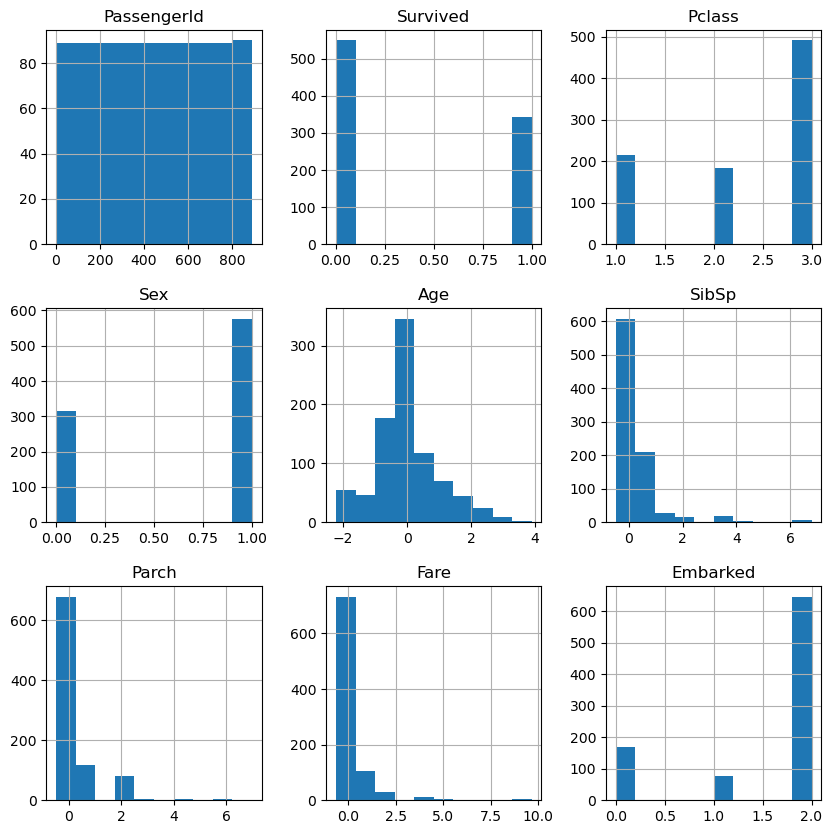

In [38]:
df.hist(bins=10,figsize=(10,10))
plt.show()